In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16954, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 16954 (delta 76), reused 95 (delta 45), pack-reused 16805 (from 1)
Receiving objects: 100% (16954/16954), 15.71 MiB | 25.41 MiB/s, done.
Resolving deltas: 100% (11609/11609), done.


In [2]:
%cd yolov5

/kaggle/working/yolov5


In [3]:
%pwd

'/kaggle/working/yolov5'

In [4]:
!pip install -r requirements.txt
import torch

from IPython.display import Image, clear_output
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 28.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.
Setup complete. Using torch 2.4.0+cpu CPU


In [5]:
%cd ../

/kaggle/working


In [6]:
!curl -L "https://github.com/PhamAnhTienn/data/raw/refs/heads/main/sign%20language.zip" > SignData.zip; unzip SignData.zip; rm SignData.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1045k  100 1045k    0     0  1783k      0 --:--:-- --:--:-- --:--:-- 1783k
Archive:  SignData.zip
  inflating: sign language/data.yaml  
   creating: sign language/test/
   creating: sign language/test/images/
  inflating: sign language/test/images/Hello-ca9c1d7e-7124-11ef-aa4c-997d98df9a3b_jpg.rf.10e8e8441a94ed1aad6f1b805f8e30ca.jpg  
  inflating: sign language/test/images/ILoveYou-be56a7cf-7124-11ef-8e5e-997d98df9a3b_jpg.rf.ce97f394eb8a1309a0da5239f7e7ba7e.jpg  
  inflating: sign language/test/images/No-b286a3e2-7124-11ef-8509-997d98df9a3b_jpg.rf.fc74b63fe458b61502ad8c1d2600ca31.jpg  
   creating: sign language/test/labels/
  inflating: sign language/test/labels/Hello-ca9c1d7e-7124-11ef-aa4c-997d98df9a3b_jpg.rf.10e8e8441a94ed1aad6f1b805f8e30ca.txt

In [7]:
%ls

'sign language'/   yolov5/


In [8]:
%cd 'sign language'

/kaggle/working/sign language


In [9]:
ls

data.yaml  test/  train/


In [10]:
%cat data.yaml

train: /kaggle/working/sign language/train/images
val: /kaggle/working/sign language/test/images

nc: 6
names: ['Hello', 'Love', 'No', 'Special', 'Thanks', 'Yes']


In [11]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [12]:
num_classes = int(num_classes)
num_classes

6

In [13]:
%cat /kaggle/working/yolov5/models/yolov5s.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [14]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [15]:
%%writetemplate /kaggle/working/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

img: define input image size

batch: determine batch size

epochs: define the number of training epochs. (often, 3000+ are common)

data: set the path to our yaml file

cfg: specify our model configuration

weights: specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive folder)

name: result names

nosave: only save the final checkpoint

cache: cache images for faster training

In [16]:
%%time
# train yolov5s on custom data for 300 epochs
# time its performance
%cd /kaggle/working/yolov5/
!python train.py --img 640 --batch 16 --epochs 300 --data '/kaggle/working/sign language/data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache

/kaggle/working/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=/kaggle/working/sign language/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, loca

In [17]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

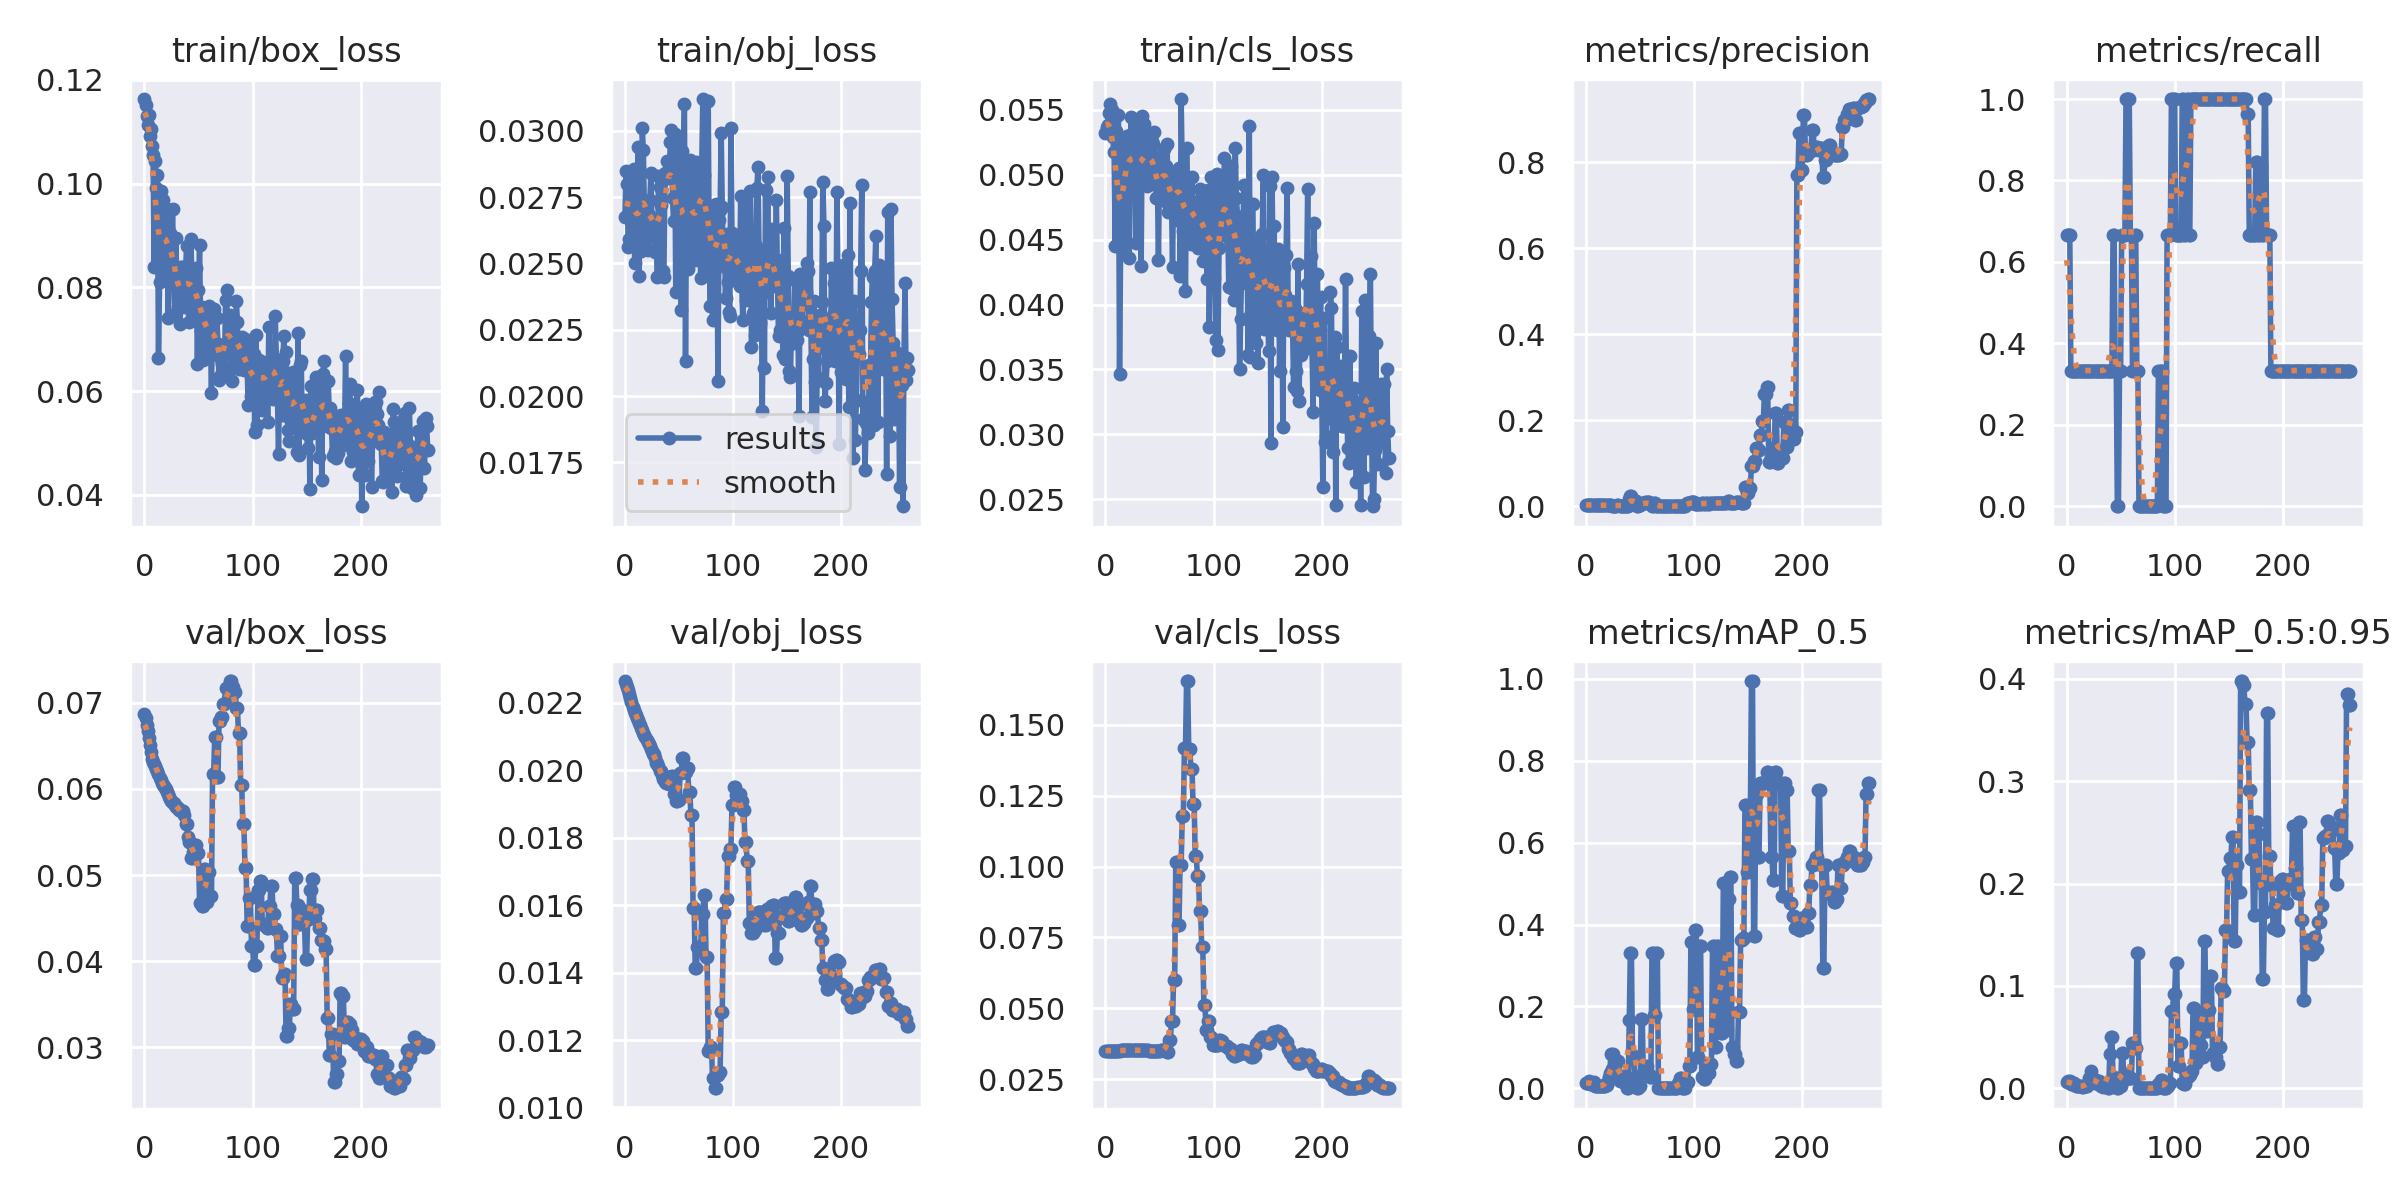

In [18]:
from utils.plots import plot_results  
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/results.png', width=1000)

GROUND TRUTH TRAINING DATA:


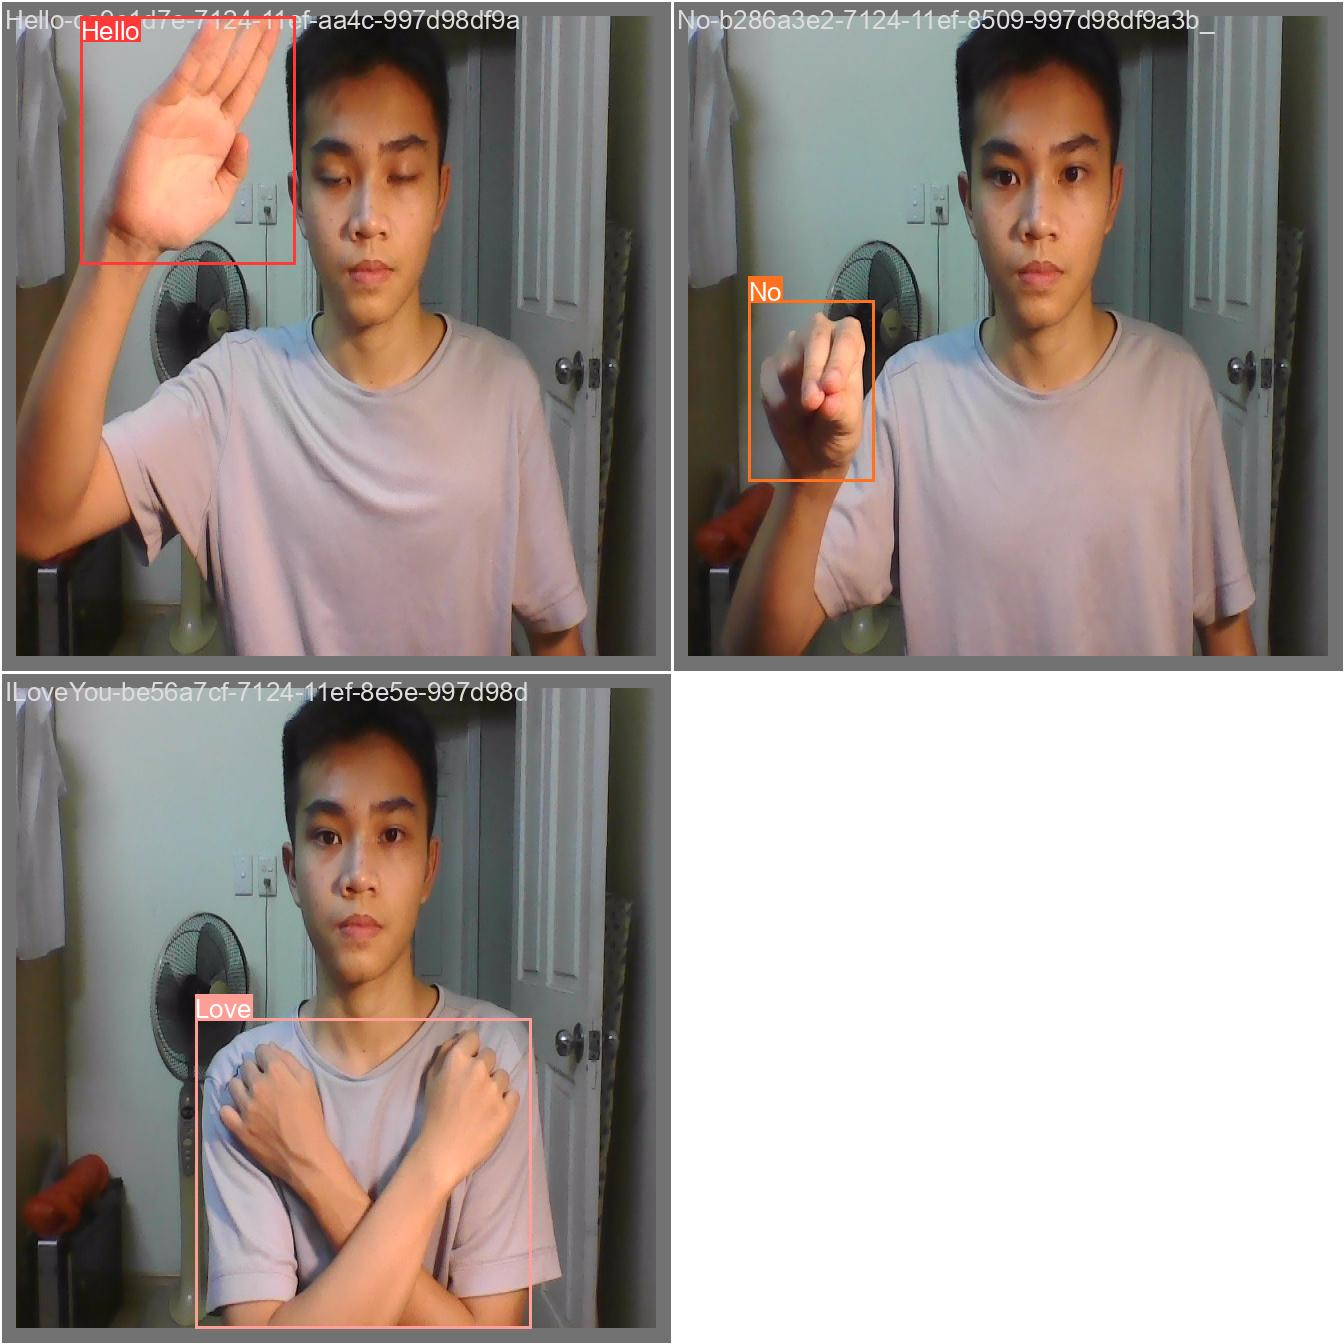

In [19]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


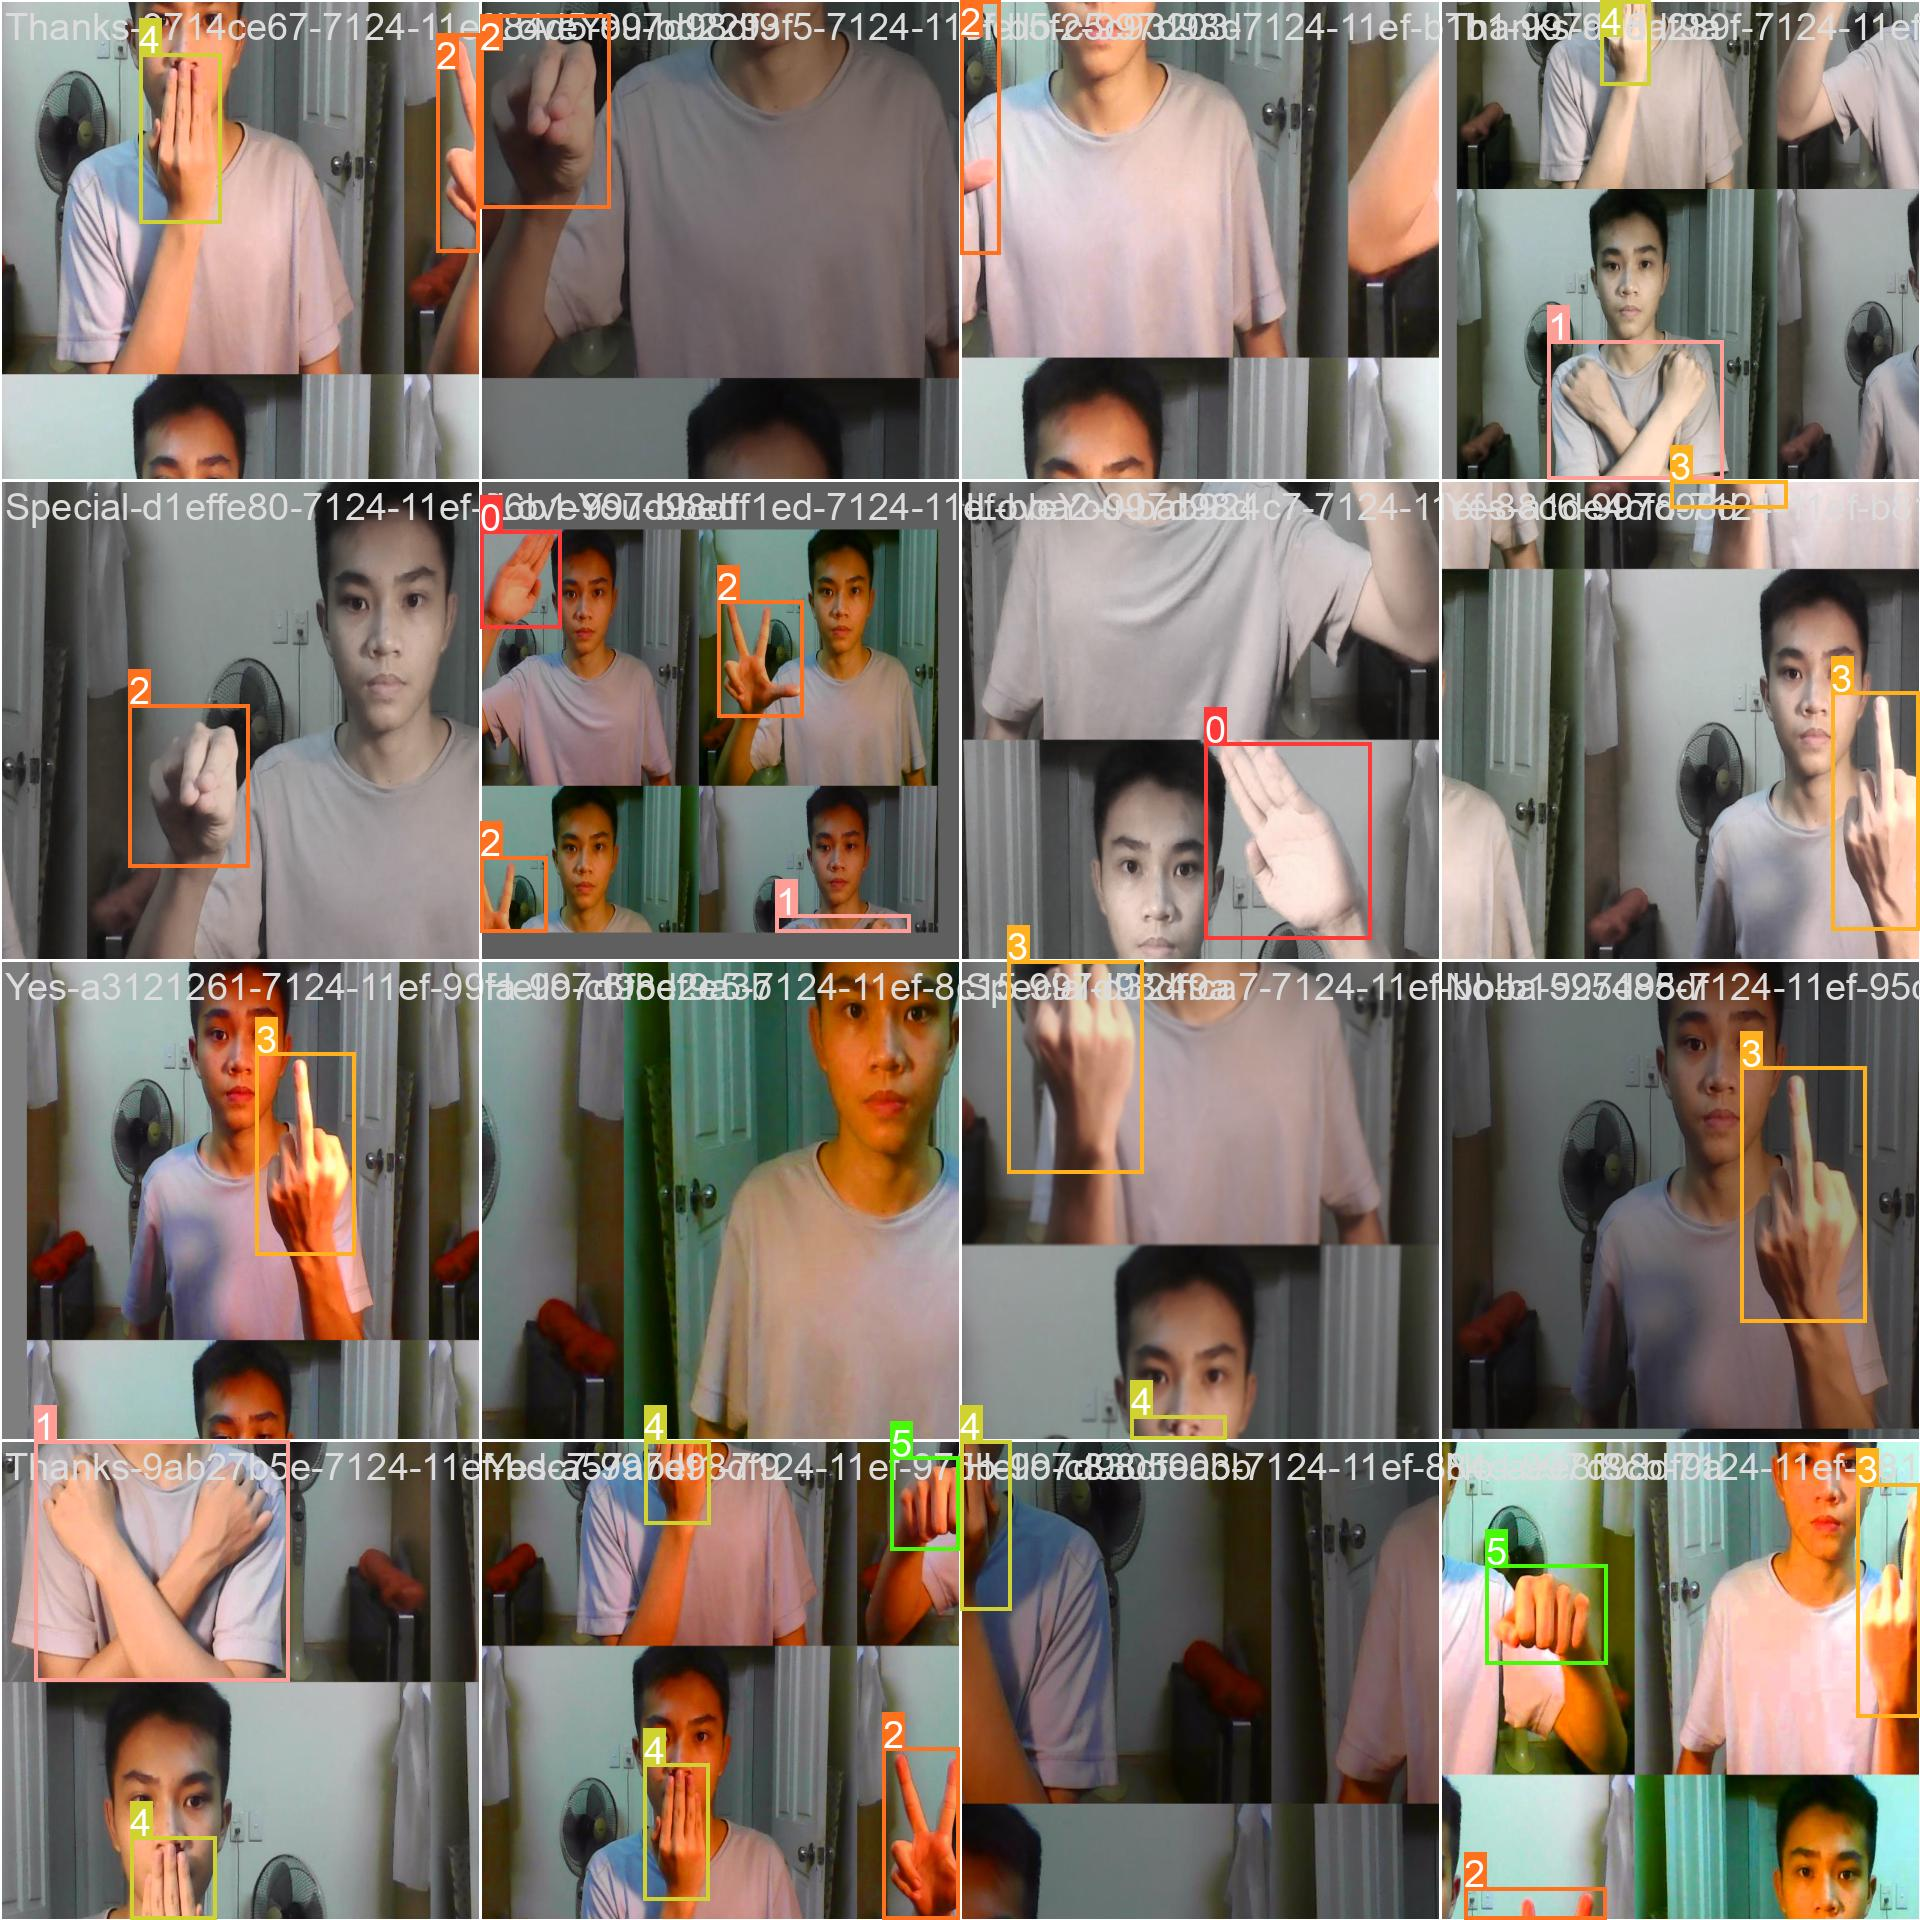

In [20]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [21]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [24]:
%cd /kaggle/working/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.5 --source "/kaggle/working/sign language/test/images"

/kaggle/working/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/kaggle/working/sign language/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.14 torch-2.4.0+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7260003 parameters, 0 gradients
image 1/3 /kaggle/working/sign language/test/images/Hello-ca9c1d7e-7124-11ef-aa4c-997d98df9a3b_jpg.rf.10e8e8441a94ed1aad6f1b805f8e30ca.jpg: 640x640 (no detections), 349.9ms
image 2/3 /kaggle/working/sign language/test/images/ILoveYou-be56a7cf-7124-11ef-8e5e-997d98df9a3b_jpg.rf.ce97f394eb